In [9]:
linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5")

da = df_all_chan.to_numpy()

window_input_width = 200

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=True)

history = {}
val_performance = {}
performance = {}

history['lstm_'+str(window_input_width)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)


val_performance['lstm_'+str(window_input_width)] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_'+str(window_input_width)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
14/14 [==============================] - 2s 92ms/step - loss: 3.7466 - mean_absolute_error: 1.4477 - val_loss: 2.2450 - val_mean_absolute_error: 1.1939
Epoch 2/100
14/14 [==============================] - 1s 77ms/step - loss: 1.4934 - mean_absolute_error: 0.8843 - val_loss: 1.5943 - val_mean_absolute_error: 0.9345
Epoch 3/100
14/14 [==============================] - 1s 74ms/step - loss: 1.0279 - mean_absolute_error: 0.7115 - val_loss: 1.3336 - val_mean_absolute_error: 0.8513
Epoch 4/100
14/14 [==============================] - 1s 72ms/step - loss: 0.8359 - mean_absolute_error: 0.6392 - val_loss: 1.2331 - val_mean_absolute_error: 0.7852
Epoch 5/100
14/14 [==============================] - 1s 72ms/step - loss: 0.7911 - mean_absolute_error: 0.6003 - val_loss: 1.0578 - val_mean_absolute_error: 0.7484
Epoch 6/100
14/14 [==============================] - 1s 72ms/step - loss: 0.7355 - mean_absolute_error: 0.5821 - val_loss: 1

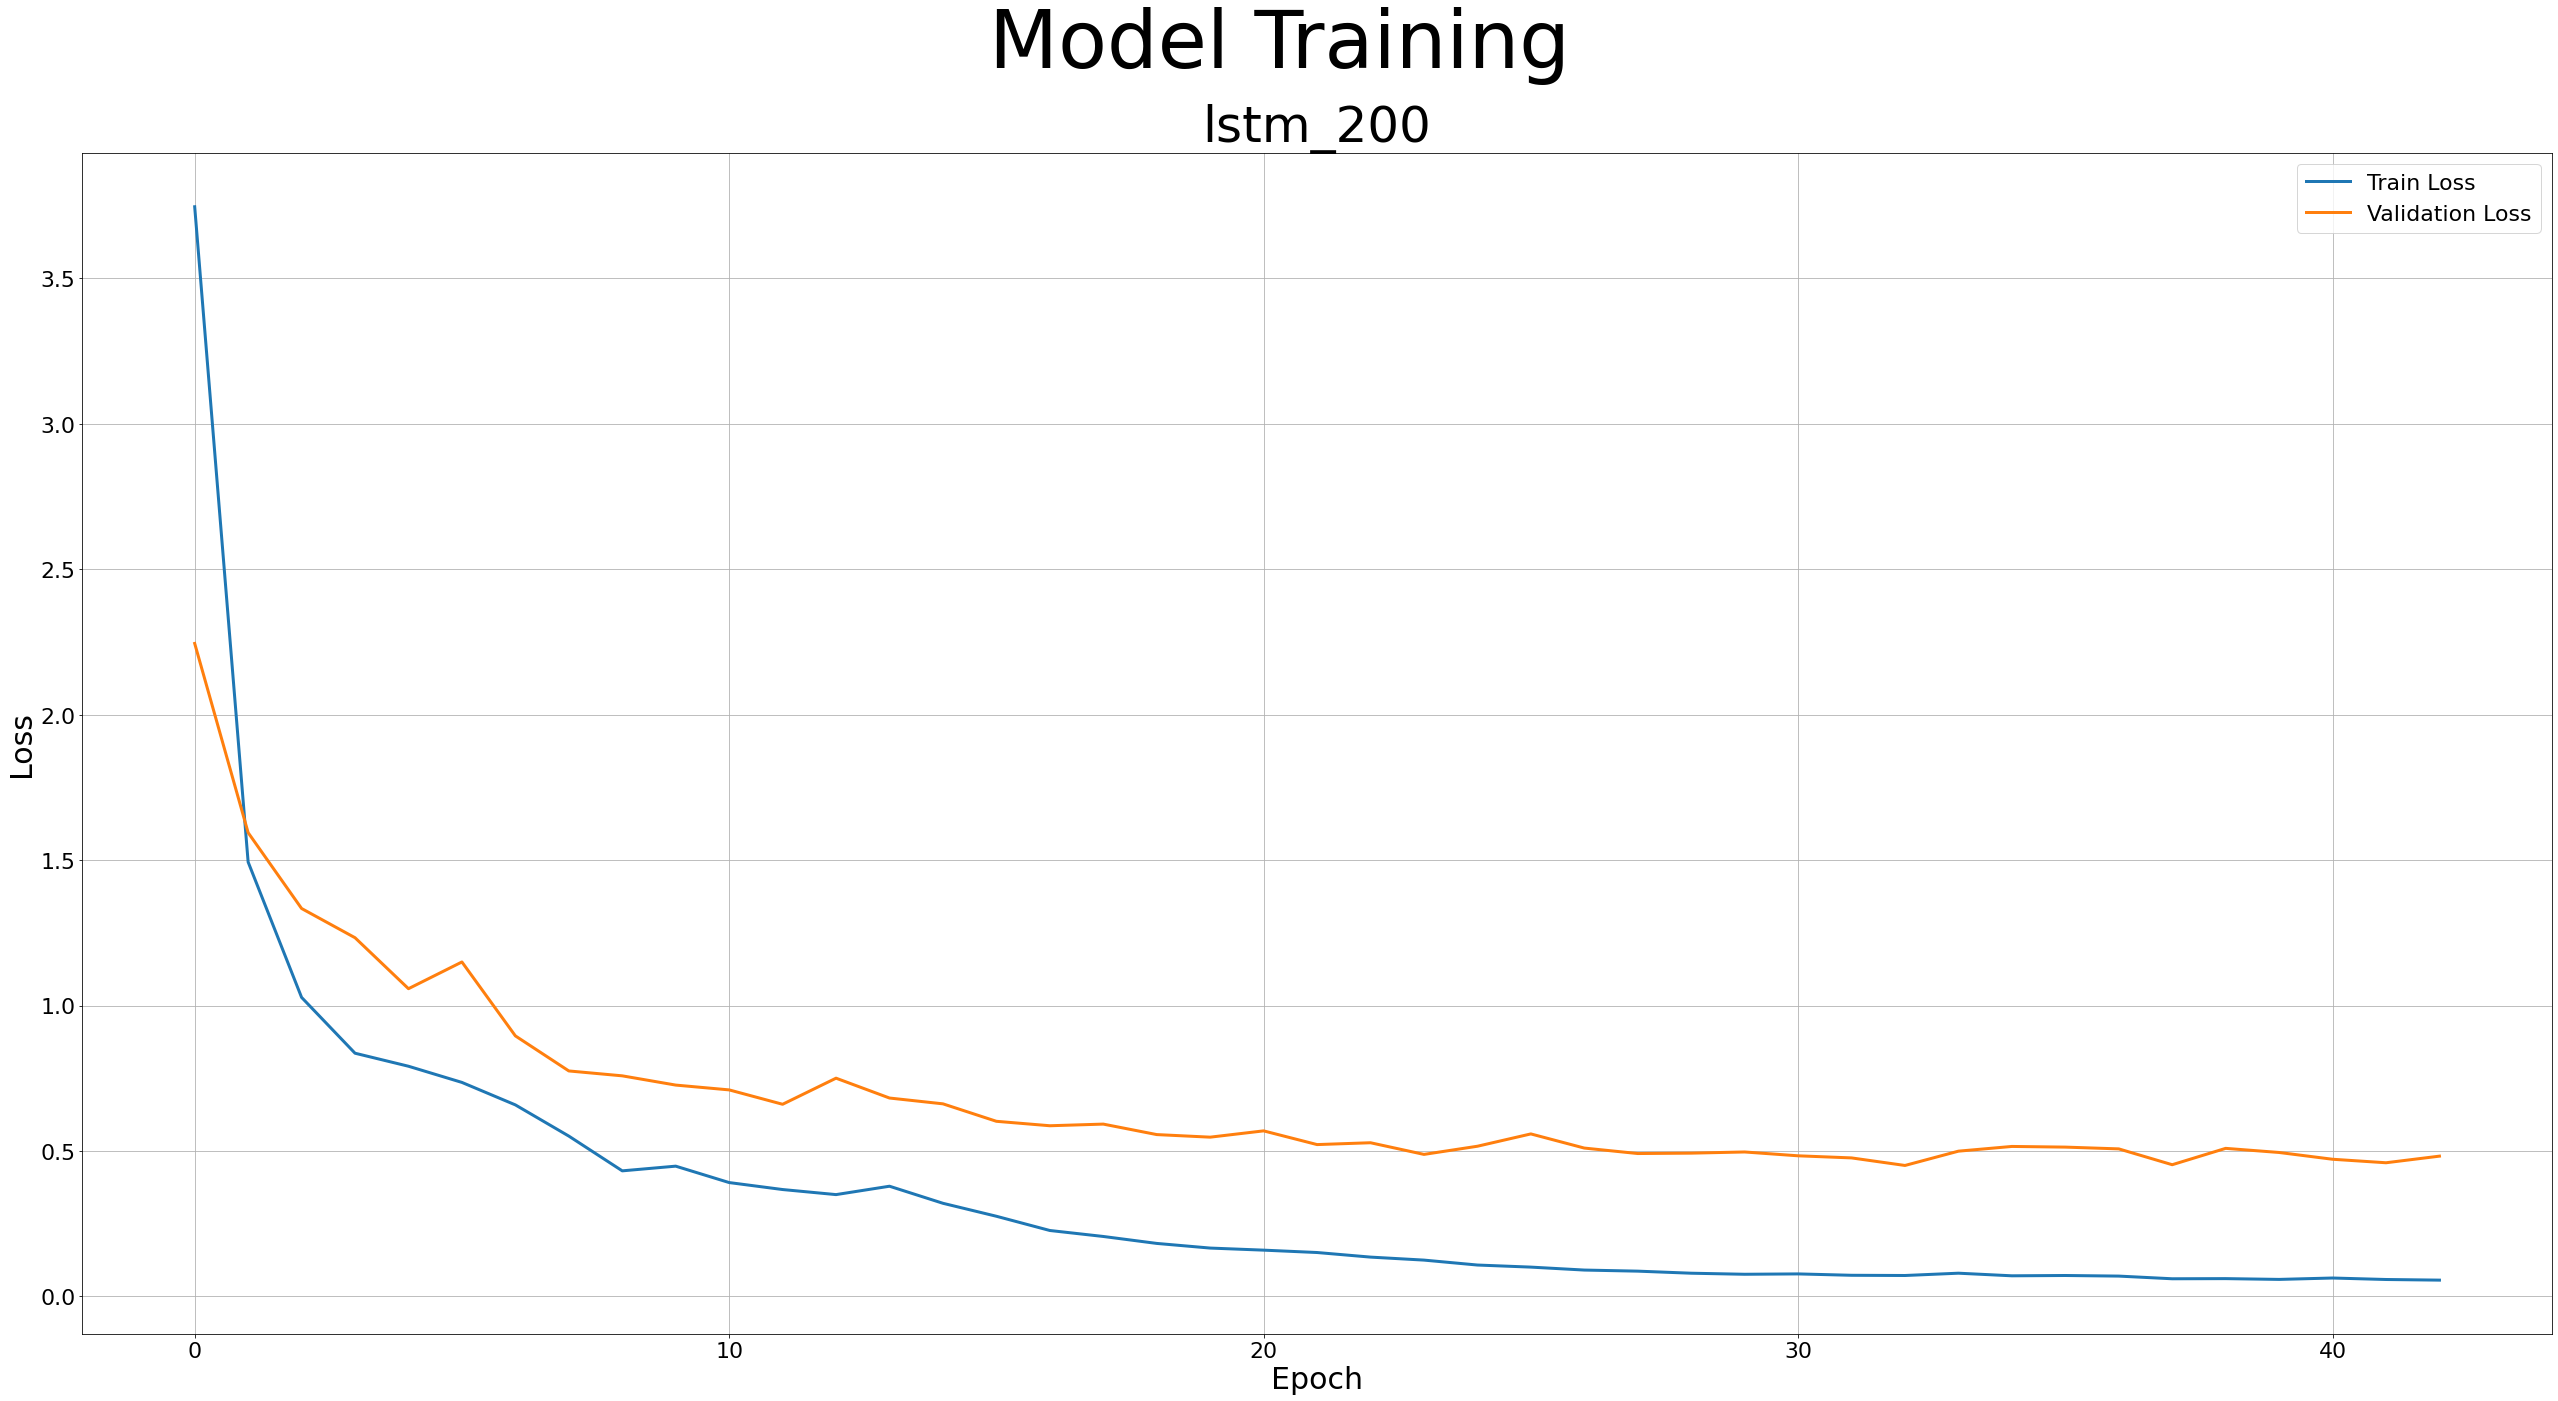

In [10]:
#Plotting one graph

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, ax0 = plt.subplots(nrows=1, 
                         ncols=1, 
                         sharey=False, 
                         sharex=False,
                         figsize=(36,20))
fig.patch.set_facecolor('white')


ax0.plot(history['lstm_200'].history['loss'], label='Train Loss',linewidth=3)
ax0.plot(history['lstm_200'].history['val_loss'], label='Validation Loss',linewidth=3)
ax0.grid(True)
ax0.legend()
ax0.set_title('lstm_200',size=50)
ax0.set_ylabel('Loss', size=30)
ax0.set_xlabel('Epoch', size=30)
#ax0.set_ylim([0,1])
    
fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()